In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = 'https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv'
elect_df = pd.read_csv(filename)

In [3]:
elect_df.head(3)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565


In [4]:
elect_df.rename(columns={'FullDate':'ds', 'ElecPrice':'y'}, inplace=True)

In [5]:
elect_df.head(2)

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635


In [6]:
elect_df[ "ds" ] = pd.to_datetime(elect_df[ "ds" ]) 
elect_df.set_index( "ds" , inplace= True)

In [7]:
df = elect_df.resample( 'D' ).mean()
df.head(3)

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,15.8,1731.890833,3.69,114.654167
2010-09-02,15.4,1620.791250,3.69,23.783750
2010-09-03,18.3,1736.073333,4.45,21.040625


**Question 11**

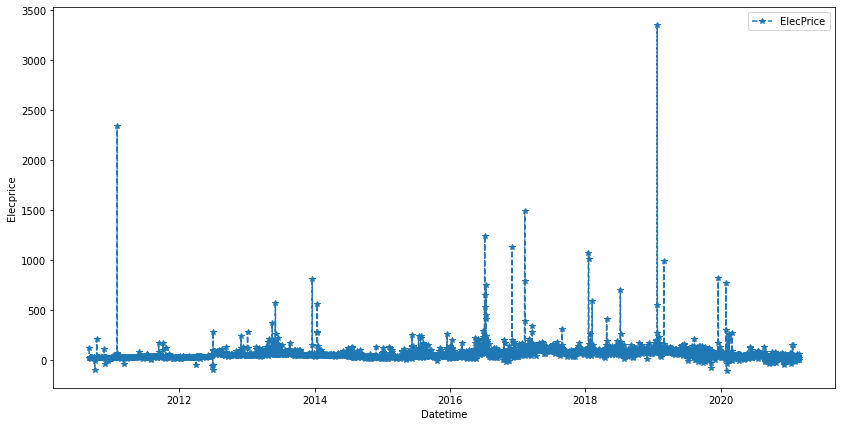

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(df['y'], '--' , marker= '*' , )
plt.xlabel('Datetime')
plt.ylabel('Elecprice')
plt.legend(['ElecPrice'])
plt.show()

In [9]:
df.reset_index(inplace=True)
df= df.rename(columns = {'index':'ds'})

In [10]:
df.head(3)

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,15.8,1731.890833,3.69,114.654167
1,2010-09-02,15.4,1620.791250,3.69,23.783750
2,2010-09-03,18.3,1736.073333,4.45,21.040625


**Question 12**

In [11]:
from statsmodels.tsa.stattools import adfuller
Y = df['SysLoad'].values
result = adfuller(Y)
print('p-value of Sysload: %f' % result[1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


p-value of Sysload: 0.004254


In [12]:
from statsmodels.tsa.stattools import adfuller
Y = df['GasPrice'].values
result = adfuller(Y)
print('p-value of GasPrice: %f' % result[1])

p-value of GasPrice: 0.045027


**Question 13**

In [13]:
GasY = df['GasPrice'].values
result = adfuller(GasY)
print('Critical Values for GasPrice:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Critical Values for GasPrice:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [14]:
ElecY = df['y'].values
result = adfuller(ElecY)
print('Critical Values for ElecPrice:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Critical Values for ElecPrice:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Univariate time series

In [15]:
elect_new = df[['ds', 'y']]

In [16]:
elect_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3834 non-null   datetime64[ns]
 1   y       3834 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.0 KB


In [17]:
train= elect_new.iloc[:2757, :]
test= elect_new.iloc[2757:,:]

In [18]:
from fbprophet import Prophet

model = Prophet()
model.fit(train)

forecast=model.predict(test)
forecast.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1072,2021-02-24,147.867971,21.136321,273.851527,76.221493,220.348458,-3.731143,-3.731143,-3.731143,6.640747,6.640747,6.640747,-10.371890,-10.371890,-10.371890,0.0,0.0,0.0,144.136828
1073,2021-02-25,147.901439,27.092060,272.856057,76.197929,220.480243,-0.979570,-0.979570,-0.979570,10.713780,10.713780,10.713780,-11.693350,-11.693350,-11.693350,0.0,0.0,0.0,146.921870
1074,2021-02-26,147.934908,17.829352,272.246897,76.177620,220.612027,-10.730497,-10.730497,-10.730497,2.094989,2.094989,2.094989,-12.825486,-12.825486,-12.825486,0.0,0.0,0.0,137.204411
1075,2021-02-27,147.968376,10.347073,250.718674,76.164565,220.743812,-25.070975,-25.070975,-25.070975,-11.310788,-11.310788,-11.310788,-13.760187,-13.760187,-13.760187,0.0,0.0,0.0,122.897401
1076,2021-02-28,148.001845,2.202235,246.973397,76.151510,220.871936,-28.774486,-28.774486,-28.774486,-14.281269,-14.281269,-14.281269,-14.493217,-14.493217,-14.493217,0.0,0.0,0.0,119.227358


In [19]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]] 

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,105.534007,10.695859,204.321421,111.989873,111.989873,111.989873
1,2018-03-21,111.923322,5.726008,218.320436,112.023341,112.023341,112.023341
2,2018-03-22,116.048979,16.610684,209.040247,112.056809,112.056809,112.056809
3,2018-03-23,107.388138,4.332970,202.895839,112.090278,112.090278,112.090278
4,2018-03-24,93.855705,-5.758518,188.643079,112.123746,112.123746,112.123746
...,...,...,...,...,...,...,...
1072,2021-02-24,144.136828,21.136321,273.851527,147.867971,76.221493,220.348458
1073,2021-02-25,146.921870,27.092060,272.856057,147.901439,76.197929,220.480243
1074,2021-02-26,137.204411,17.829352,272.246897,147.934908,76.177620,220.612027
1075,2021-02-27,122.897401,10.347073,250.718674,147.968376,76.164565,220.743812


**Question 14**

In [20]:
def MAPE(actual, prediction):
  actual, prediction = np.array(actual), np.array(prediction)
  MAPE = np.mean(np.abs((actual-prediction)/actual))*100
  return MAPE

actual = test['y']
prediction = forecast.iloc[:1077]['yhat']

print('MAPE: ',round(MAPE(actual, prediction),2))

MAPE:  546.79


**Question 15**

In [21]:
from statsmodels.tools.eval_measures import rmse
print(round(rmse(prediction, actual),2))

133.84


**Question 16**

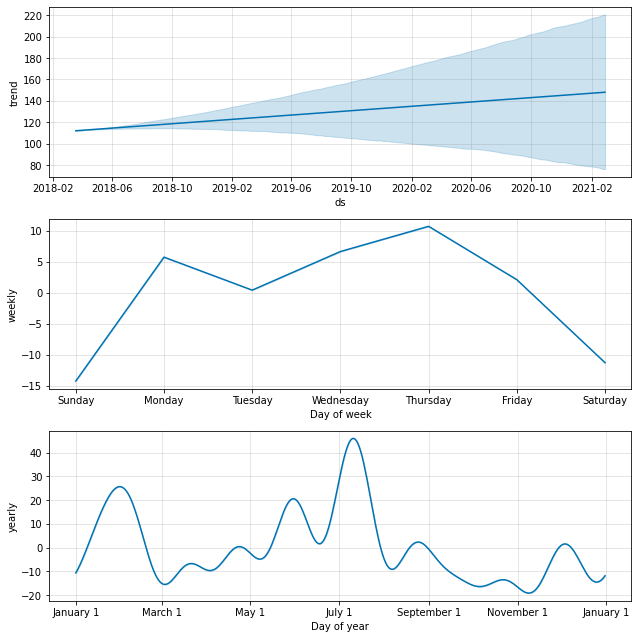

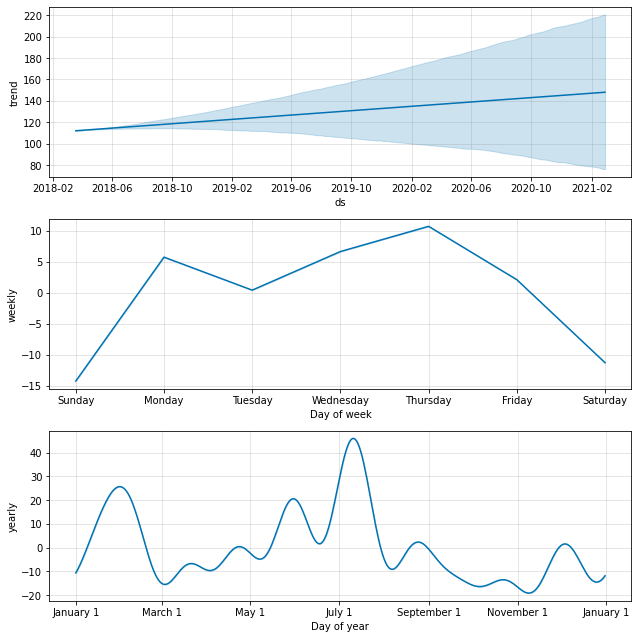

In [22]:
model.plot_components(forecast)

Multivariate time series

In [23]:
df.head(3)

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,15.8,1731.890833,3.69,114.654167
1,2010-09-02,15.4,1620.791250,3.69,23.783750
2,2010-09-03,18.3,1736.073333,4.45,21.040625


In [24]:
train= df.iloc[:2757, :]
test= df.iloc[2757:,:]

In [25]:
model_new = Prophet()
model_new.add_regressor('SysLoad')
model_new.add_regressor('Tmax')
model_new.add_regressor('GasPrice')
model_new.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
forecast_new=model_new.predict(test)
forecast_new.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,GasPrice,GasPrice_lower,GasPrice_upper,SysLoad,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1072,2021-02-24,109.161351,-59.396698,137.882314,77.506463,143.574986,4.811322,4.811322,4.811322,-57.195357,...,1.769272,1.769272,1.769272,-18.093478,-18.093478,-18.093478,0.0,0.0,0.0,40.462803
1073,2021-02-25,109.190478,-36.557391,155.686240,77.464841,143.661718,2.432668,2.432668,2.432668,-43.054609,...,6.065252,6.065252,6.065252,-19.194617,-19.194617,-19.194617,0.0,0.0,0.0,55.448935
1074,2021-02-26,109.219606,-34.740700,158.025065,77.423219,143.744251,2.234813,2.234813,2.234813,-31.447553,...,-1.847989,-1.847989,-1.847989,-20.055278,-20.055278,-20.055278,0.0,0.0,0.0,58.113256
1075,2021-02-27,109.248733,-56.982250,137.099291,77.396278,143.826785,2.173258,2.173258,2.173258,-42.136384,...,-4.894793,-4.894793,-4.894793,-20.665551,-20.665551,-20.665551,0.0,0.0,0.0,43.734859
1076,2021-02-28,109.277861,-46.412065,150.599147,77.375089,143.909318,3.122961,3.122961,3.122961,-38.074162,...,-2.890903,-2.890903,-2.890903,-21.020410,-21.020410,-21.020410,0.0,0.0,0.0,50.424871


In [27]:
forecast_new[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]] 

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,82.947371,-6.697452,165.728360,77.936721,77.936721,77.936721
1,2018-03-21,82.588850,-5.547137,175.187493,77.965848,77.965848,77.965848
2,2018-03-22,120.942749,29.522205,214.079914,77.994976,77.994976,77.994976
3,2018-03-23,107.784416,15.517692,206.172472,78.024103,78.024103,78.024103
4,2018-03-24,59.984934,-28.578491,152.080286,78.053231,78.053231,78.053231
...,...,...,...,...,...,...,...
1072,2021-02-24,40.462803,-59.396698,137.882314,109.161351,77.506463,143.574986
1073,2021-02-25,55.448935,-36.557391,155.686240,109.190478,77.464841,143.661718
1074,2021-02-26,58.113256,-34.740700,158.025065,109.219606,77.423219,143.744251
1075,2021-02-27,43.734859,-56.982250,137.099291,109.248733,77.396278,143.826785


**Question 17**

In [28]:
actual = test['y']
prediction = forecast_new.iloc[:1077]['yhat']

print('MAPE: ',round(MAPE(actual, prediction),2))

MAPE:  234.07


**Question 18**

In [29]:
from statsmodels.tools.eval_measures import rmse
print(round(rmse(prediction, actual),2))

112.92


**Question 19**

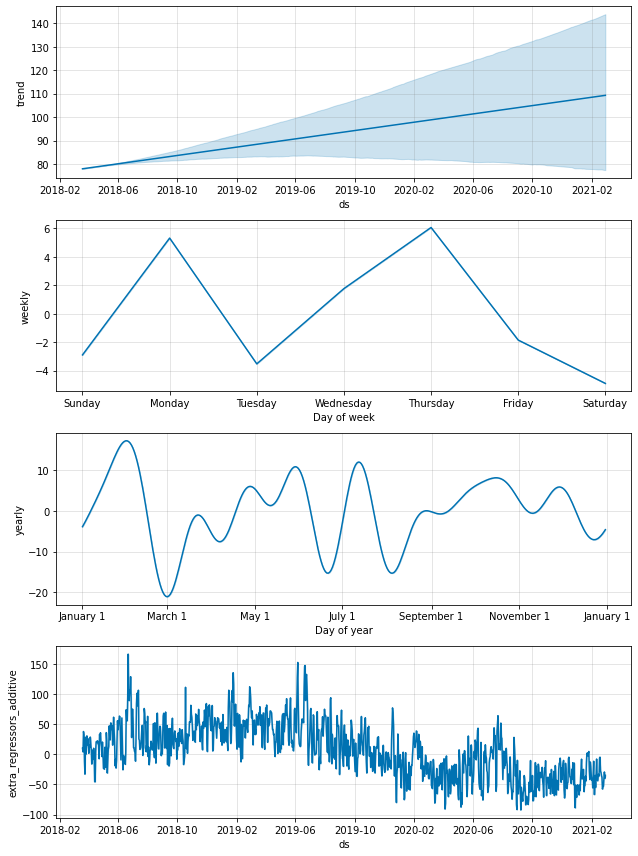

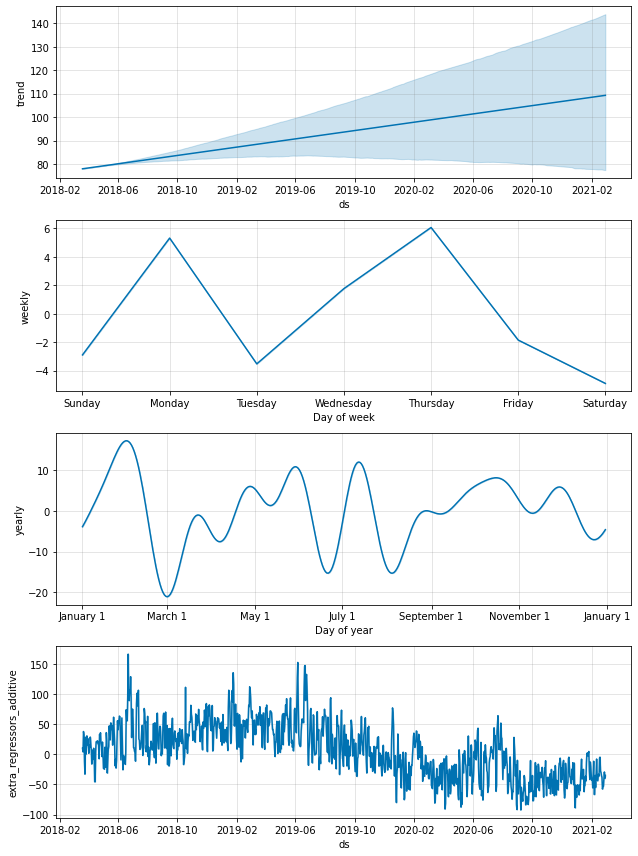

In [30]:
model_new.plot_components(forecast_new)

**Question 20**

In [31]:
df_3 = df.copy()
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        3834 non-null   datetime64[ns]
 1   Tmax      3834 non-null   float64       
 2   SysLoad   3834 non-null   float64       
 3   GasPrice  3834 non-null   float64       
 4   y         3834 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 149.9 KB


In [32]:
train= df.iloc[:2757, :]
test= df.iloc[2757:,:]

In [33]:
train.drop(columns='Tmax')

,ds,SysLoad,GasPrice,y
0,2010-09-01,1731.890833,3.6900,114.654167
1,2010-09-02,1620.791250,3.6900,23.783750
2,2010-09-03,1736.073333,4.4500,21.040625
3,2010-09-04,1484.920208,3.3900,20.928125
4,2010-09-05,1483.808750,4.4500,20.856458
...,...,...,...,...
2752,2018-03-15,1130.792744,9.1928,113.222500
2753,2018-03-16,821.269333,9.0400,94.888958
2754,2018-03-17,44.972794,8.7100,71.599375
2755,2018-03-18,-170.934915,8.4995,45.333958


In [34]:
model_3 = Prophet()
model_3.add_regressor('SysLoad')
model_3.add_regressor('GasPrice')
model_3.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
forecast_3= model_3.predict(test)
forecast_3.head(4)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,GasPrice,GasPrice_lower,GasPrice_upper,SysLoad,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,77.942571,-10.096835,175.983930,77.942571,77.942571,45.805312,45.805312,45.805312,-35.687275,...,-3.511402,-3.511402,-3.511402,-1.615359,-1.615359,-1.615359,0.0,0.0,0.0,82.933847
1,2018-03-21,77.971590,-8.911901,176.024497,77.971590,77.971590,46.823115,46.823115,46.823115,-42.772116,...,1.780510,1.780510,1.780510,-1.227958,-1.227958,-1.227958,0.0,0.0,0.0,82.575142
2,2018-03-22,78.000608,27.241840,212.052704,78.000608,78.000608,46.823115,46.823115,46.823115,-8.957841,...,6.053270,6.053270,6.053270,-1.017767,-1.017767,-1.017767,0.0,0.0,0.0,120.901385
3,2018-03-23,78.029627,7.152845,195.504206,78.029627,78.029627,44.009879,44.009879,44.009879,-11.455610,...,-1.837707,-1.837707,-1.837707,-0.978903,-0.978903,-0.978903,0.0,0.0,0.0,107.767285


In [36]:
forecast_3[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]] 

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,82.933847,-10.096835,175.983930,77.942571,77.942571,77.942571
1,2018-03-21,82.575142,-8.911901,176.024497,77.971590,77.971590,77.971590
2,2018-03-22,120.901385,27.241840,212.052704,78.000608,78.000608,78.000608
3,2018-03-23,107.767285,7.152845,195.504206,78.029627,78.029627,78.029627
4,2018-03-24,59.955338,-36.909083,148.011003,78.058645,78.058645,78.058645
...,...,...,...,...,...,...,...
1072,2021-02-24,40.355776,-55.374115,143.513754,109.050402,74.988608,138.280545
1073,2021-02-25,55.323035,-42.366295,153.427298,109.079421,74.970290,138.332484
1074,2021-02-26,58.012477,-38.806992,150.052250,109.108439,74.951973,138.379856
1075,2021-02-27,43.614573,-56.461406,131.927646,109.137458,74.933656,138.427229


**Question 20**

In [37]:
actual = test['y']
prediction = forecast_3.iloc[:1077]['yhat']

print('MAPE: ',round(MAPE(actual, prediction),2))

MAPE:  233.66
